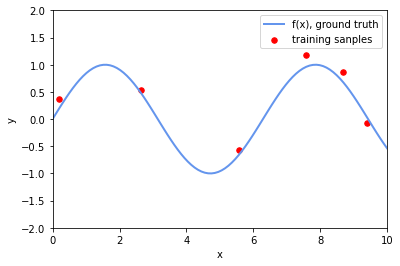

In [1]:
##まず、データを生成します

import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

def f(x):
    return  np.sin(x)

# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
seed(0)
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:6])
y = f(x)+0.1*randn(6)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

#1
colors = ['black', 'red', 'blue', 'green',]
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw, label="f(x), ground truth")
plt.scatter(x, y, color='red', s=30, marker='o', label="training sanples")
plt.xlim([0,10])
plt.ylim([-2,2])
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


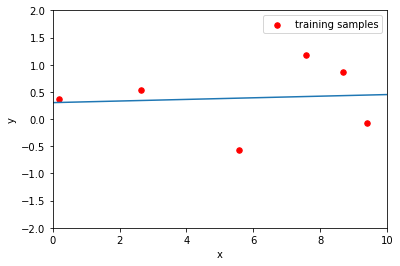

In [2]:
#単回帰による結果をみてみましょう
model =  linear_model.LinearRegression(fit_intercept=True, normalize=True,  copy_X=True, n_jobs=1)
model.fit(X,y)
y_plot = model.predict(X_plot)
plt.plot(x_plot, y_plot)
plt.scatter(x, y, color='red', s=30, marker='o', label="training samples")
plt.xlim([0,10])
plt.ylim([-2,2])
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [3]:
#多項式特徴量を生成して表示させて見ます
for degree in range(1,6):
  poly = PolynomialFeatures(degree)
  Xpoly=poly.fit_transform(X)
  print("degree=", degree, "\n", Xpoly)


degree= 1 
 [[1.         0.2020202 ]
 [1.         2.62626263]
 [1.         5.55555556]
 [1.         7.57575758]
 [1.         8.68686869]
 [1.         9.39393939]]
degree= 2 
 [[1.00000000e+00 2.02020202e-01 4.08121620e-02]
 [1.00000000e+00 2.62626263e+00 6.89725538e+00]
 [1.00000000e+00 5.55555556e+00 3.08641975e+01]
 [1.00000000e+00 7.57575758e+00 5.73921028e+01]
 [1.00000000e+00 8.68686869e+00 7.54616876e+01]
 [1.00000000e+00 9.39393939e+00 8.82460973e+01]]
degree= 3 
 [[1.00000000e+00 2.02020202e-01 4.08121620e-02 8.24488122e-03]
 [1.00000000e+00 2.62626263e+00 6.89725538e+00 1.81140040e+01]
 [1.00000000e+00 5.55555556e+00 3.08641975e+01 1.71467764e+02]
 [1.00000000e+00 7.57575758e+00 5.73921028e+01 4.34788658e+02]
 [1.00000000e+00 8.68686869e+00 7.54616876e+01 6.55525771e+02]
 [1.00000000e+00 9.39393939e+00 8.82460973e+01 8.28978490e+02]]
degree= 4 
 [[1.00000000e+00 2.02020202e-01 4.08121620e-02 8.24488122e-03
  1.66563257e-03]
 [1.00000000e+00 2.62626263e+00 6.89725538e+00 1.8114

degree= 1 mse= 0.33075005001856256
degree= 2 mse= 0.32522711694587525
degree= 3 mse= 0.30290034474812366
degree= 4 mse= 0.010086018410254383
degree= 5 mse= 7.555660926047029e-22


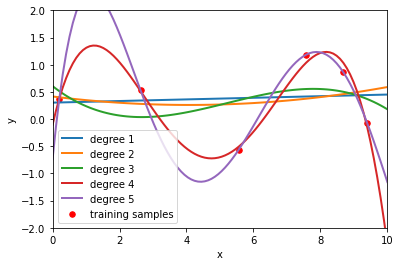

In [4]:
#各次数の多項式特徴量を使って、多項式回帰を行って見ます。
#次数、その時の最小二乗誤差(MSE)と多項式回帰のプロットを表示します
for degree in range(1,6):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(0.0))
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    y_predict = model.predict(X)
    mse=mean_squared_error(y, y_predict, multioutput='uniform_average')
    print("degree=", degree, "mse=", mse)
    plt.plot(x_plot, y_plot,  linewidth=lw, label="degree %d" % degree, )

plt.scatter(x, y, color='red', s=30, marker='o', label="training samples")
plt.legend()



plt.xlim([0,10])
plt.ylim([-2,2])
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
